<a href="https://colab.research.google.com/github/amruthab91/spark_basics/blob/main/spark__KDDCup_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and launch the spark

In [ ]:
!pip3 install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=b20e413d49babfbc58771b5f5909b3d02f23a469b1e26585e0674d06778cab6b
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
!pip install itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.9 MB/s eta 0:00:00


In [ ]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [ ]:
# reading the data using the url

import urllib.request
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz", "kddcup.data.gz")

('kddcup.data.gz', <http.client.HTTPMessage at 0x7db1c8205240>)

In [ ]:
# commands to create a basic SparkSession
from pyspark.sql import SparkSession
spark = SparkSession \
 .builder \
 .appName("Python Spark SQL basic example") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate()

In [ ]:
#Create DataFrame based on the content of KDDCup file.
df = spark.read.csv("./kddcup.data.gz")
df.show()

+---+---+----+---+---+-----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|_c0|_c1| _c2|_c3|_c4|  _c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|   _c41|
+---+---+----+---+---+-----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|  0|tcp|http| SF|215|45076|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   1|0.00|0.00|0.00|0.00|1.00|0.00|0.00|   0|   0|0.00|0.00|0.00|0.00|0.00|0.00|0.00|0.00|normal.|
|  0|tcp|http| SF|162| 4528|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   2|   2|0.00|0.00|0.00|0.00|1.00|0.00|0.00|   1|   1|1.00|0.00

In [ ]:
df.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41']

In [ ]:
#Rename the columns as follows:
df2 = df.withColumnRenamed("_c0","duration") \
 .withColumnRenamed("_c1","protocol_type")\
 .withColumnRenamed("_c2","service")\
 .withColumnRenamed("_c3","flag")\
 .withColumnRenamed("_c4","src_bytes")\
 .withColumnRenamed("_c5","dst_bytes")\
 .withColumnRenamed("_c6","land")\
 .withColumnRenamed("_c7","wrong_fragment")\
 .withColumnRenamed("_c8","urgent")\
 .withColumnRenamed("_c9","host")\
 .withColumnRenamed("_c10","num_failed_logins")\
 .withColumnRenamed("_c11","logged_in")\
 .withColumnRenamed("_c12","num_compromised")\
 .withColumnRenamed("_c13","root_shell")\
 .withColumnRenamed("_c14","su_attempted")\
 .withColumnRenamed("_c15","num_root")\
 .withColumnRenamed("_c16","num_file_creations")\
 .withColumnRenamed("_c17","num_shells")\
 .withColumnRenamed("_c18","num_access_files")\
 .withColumnRenamed("_c19","num_outbound_cmds")\
 .withColumnRenamed("_c20","is_host_login")\
 .withColumnRenamed("_c21","is_guest_login")\
 .withColumnRenamed("_c22","count")\
 .withColumnRenamed("_c23","srv_count")\
 .withColumnRenamed("_c24","serror_rate")\
 .withColumnRenamed("_c25","srv_serror_rate")\
 .withColumnRenamed("_c26","rerror_rate")\
 .withColumnRenamed("_c27","srv_rerror_rate")\
 .withColumnRenamed("_c28","same_srv_rate")\
 .withColumnRenamed("_c29","diff_srv_rate")\
 .withColumnRenamed("_c30","srv_diff_host_rate")\
 .withColumnRenamed("_c31","dst_host_count")\
 .withColumnRenamed("_c32","dst_host_srv_count")\
 .withColumnRenamed("_c33","dst_host_same_srv_rate")\
 .withColumnRenamed("_c34","dst_host_diff_srv_rate")\
 .withColumnRenamed("_c35","dst_host_same_src_port_rate")\
 .withColumnRenamed("_c36","dst_host_srv_diff_host_rate")\
 .withColumnRenamed("_c37","dst_host_serror_rate")\
 .withColumnRenamed("_c38","dst_host_srv_serror_rate")\
 .withColumnRenamed("_c39","dst_host_rerror_rate")\
 .withColumnRenamed("_c40","dst_host_srv_rerror_rate")\
 .withColumnRenamed("_c41","connection_status")


In [ ]:
df2.columns

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'host',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'connection_status']

SQL Queries and Visualisation

In [ ]:
df2.createOrReplaceTempView("KddView")
sqlDF = spark.sql("SELECT * FROM KddView")
sqlDF.show()

+--------+-------------+-------+----+---------+---------+----+--------------+------+----+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-----------------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|host|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_diff_host_

In [ ]:
#Query 1: List the number of connections for different connections’ statuses
sqlDF = spark.sql("SELECT connection_status, count(*) FROM KddView GROUP BY connection_status")
sqlDF.show()

+-----------------+--------+
|connection_status|count(1)|
+-----------------+--------+
|     warezmaster.|      20|
|           smurf.| 2807886|
|             pod.|     264|
|            imap.|      12|
|            nmap.|    2316|
|    guess_passwd.|      53|
|         ipsweep.|   12481|
|       portsweep.|   10413|
|           satan.|   15892|
|            land.|      21|
|      loadmodule.|       9|
|       ftp_write.|       8|
| buffer_overflow.|      30|
|         rootkit.|      10|
|     warezclient.|    1020|
|        teardrop.|     979|
|            perl.|       3|
|             phf.|       4|
|        multihop.|       7|
|         neptune.| 1072017|
+-----------------+--------+
only showing top 20 rows



 present the results visually by following code:

<Axes: xlabel='connection_status'>

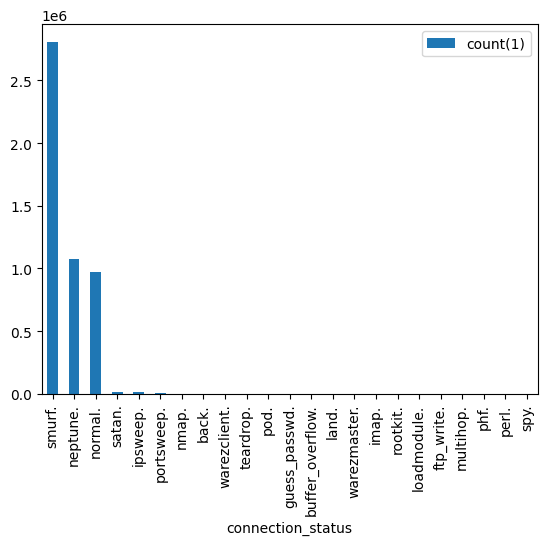

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='count(1)',ascending=False).plot(x='connection_status', y='count(1)', kind = 'bar')

<Axes: xlabel='connection_status'>

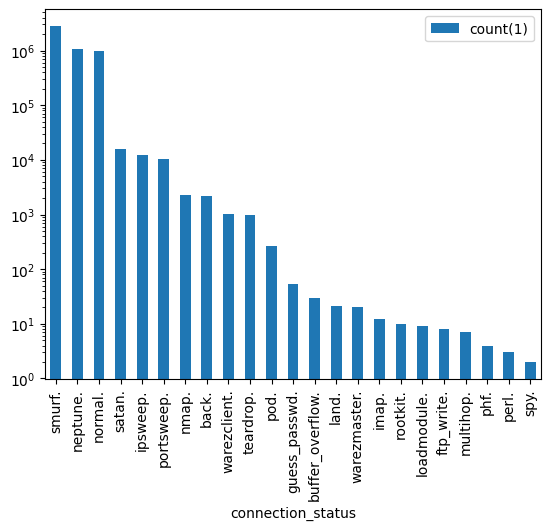

In [ ]:
pandas_df.sort_values(by='count(1)',ascending=False).plot(x='connection_status', y='count(1)', kind = 'bar', logy=True)

In [ ]:
# List the number of connections
sqlDF = spark.sql("SELECT protocol_type, count(*) FROM KddView GROUP BY protocol_type")
sqlDF.show()


+-------------+--------+
|protocol_type|count(1)|
+-------------+--------+
|          tcp| 1870598|
|          udp|  194288|
|         icmp| 2833545|
+-------------+--------+



Extract the visual presentation

<Axes: xlabel='protocol_type'>

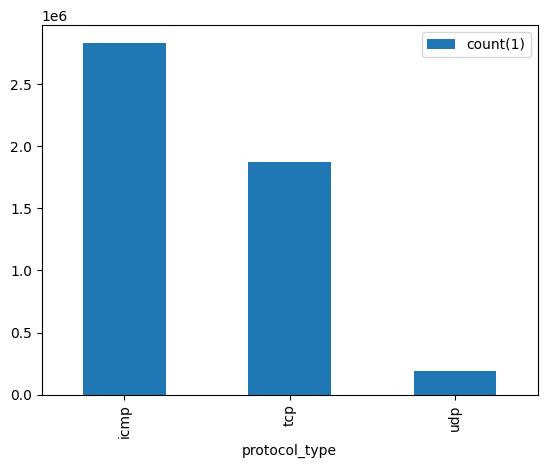

In [ ]:
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='count(1)',ascending=False).plot(x='protocol_type', y='count(1)', kind = 'bar')

<Axes: ylabel='count(1)'>

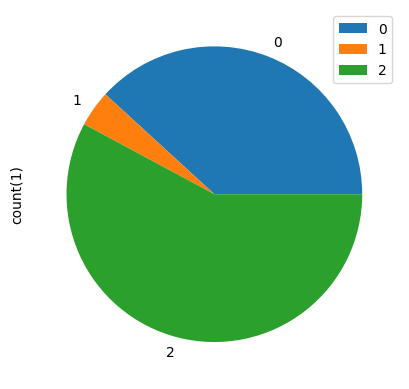

In [ ]:
#code for Pie chart
pandas_df.plot(x ='protocol_type', y='count(1)', kind = 'pie')

List the name of services used for udp connections which is not host
login. We use DISTINCT to eliminates duplicate records from the results

In [ ]:
sqlDF = spark.sql("SELECT DISTINCT service from KddView where is_host_login=0 and protocol_type='udp'")
sqlDF.show()

+--------+
| service|
+--------+
|   ntp_u|
|  tftp_u|
|domain_u|
|   other|
| private|
+--------+



 List the number of different services used for udp connections which is
not host login.

In [ ]:
sqlDF = spark.sql("SELECT service, count(*) from KddView where is_host_login=0 and protocol_type='udp' group by service;")
sqlDF.show()

+--------+--------+
| service|count(1)|
+--------+--------+
|   ntp_u|    3833|
|  tftp_u|       3|
|domain_u|   57782|
|   other|   56155|
| private|   76515|
+--------+--------+



Visual representations

<Axes: xlabel='service'>

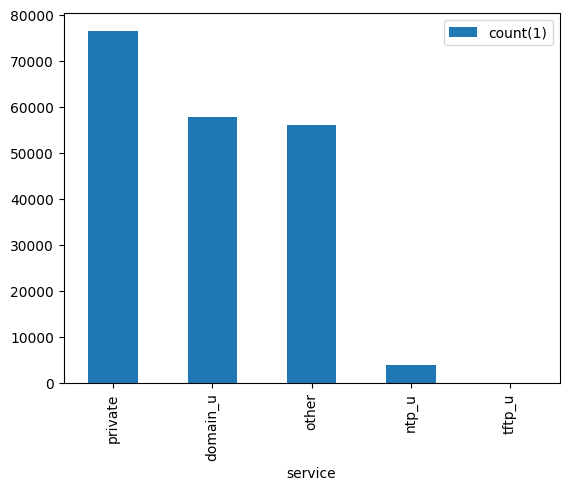

In [ ]:
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='count(1)',ascending=False).plot(x='service', y='count(1)', kind = 'bar')

<Axes: ylabel='count(1)'>

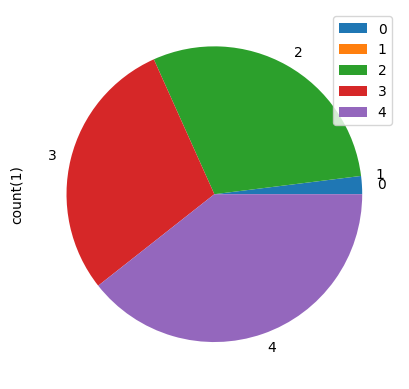

In [ ]:
pandas_df.plot(x ='service', y='count(1)', kind = 'pie')

In [ ]:
#different types of bad connections
sqlDF = spark.sql("SELECT DISTINCT connection_status from KddView where connection_status<>'normal.'")
sqlDF.show()

+-----------------+
|connection_status|
+-----------------+
|     warezmaster.|
|           smurf.|
|             pod.|
|            imap.|
|            nmap.|
|    guess_passwd.|
|         ipsweep.|
|       portsweep.|
|           satan.|
|            land.|
|      loadmodule.|
|       ftp_write.|
| buffer_overflow.|
|         rootkit.|
|     warezclient.|
|        teardrop.|
|            perl.|
|             phf.|
|        multihop.|
|         neptune.|
+-----------------+
only showing top 20 rows



In [ ]:
#List the number of different types of bad connections
sqlDF = spark.sql("SELECT connection_status, count(*) from KddView where connection_status<>'normal.' GROUP BY connection_status")
sqlDF.show()

+-----------------+--------+
|connection_status|count(1)|
+-----------------+--------+
|     warezmaster.|      20|
|           smurf.| 2807886|
|             pod.|     264|
|            imap.|      12|
|            nmap.|    2316|
|    guess_passwd.|      53|
|         ipsweep.|   12481|
|       portsweep.|   10413|
|           satan.|   15892|
|            land.|      21|
|      loadmodule.|       9|
|       ftp_write.|       8|
| buffer_overflow.|      30|
|         rootkit.|      10|
|     warezclient.|    1020|
|        teardrop.|     979|
|            perl.|       3|
|             phf.|       4|
|        multihop.|       7|
|         neptune.| 1072017|
+-----------------+--------+
only showing top 20 rows



Visual representations

<Axes: xlabel='connection_status'>

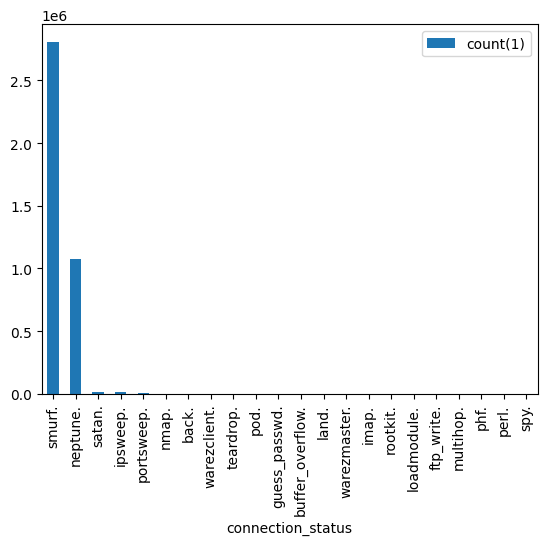

In [ ]:
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='count(1)',ascending=False).plot(x='connection_status', y='count(1)', kind = 'bar')

<Axes: xlabel='connection_status'>

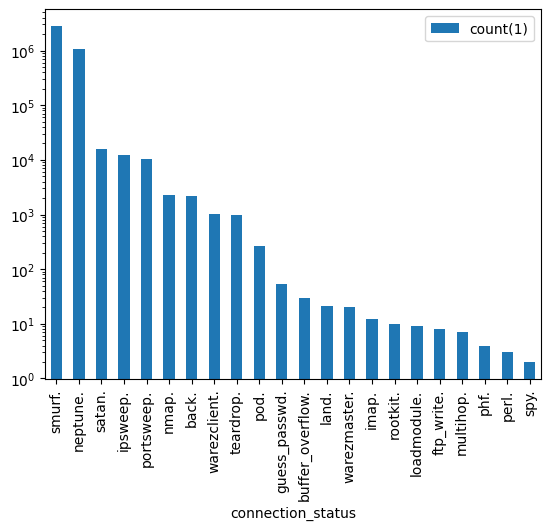

In [ ]:
#Let’s use logarithmic scale for Y axis.
pandas_df.sort_values(by='count(1)',ascending=False).plot(x='connection_status', y='count(1)', kind = 'bar', logy=True)

In [ ]:
#List the services based on the received destination packet’s bytes and the tcp protocol.
sqlDF = spark.sql("SELECT DISTINCT service from KddView where dst_bytes>1000 and protocol_type='tcp'")
sqlDF.show()

+--------+
| service|
+--------+
|  telnet|
|     ftp|
|     X11|
|   pop_3|
|   login|
|    smtp|
|  domain|
|    http|
|   other|
|     IRC|
| private|
|ftp_data|
|  finger|
|   imap4|
|     ssh|
+--------+



In [ ]:
#List the number of services based on the received destination packet’s bytes and the tcp protocol
sqlDF = spark.sql("SELECT service, count(*) from KddView where dst_bytes>1000 and protocol_type='tcp' GROUP BY service")
sqlDF.show()

+--------+--------+
| service|count(1)|
+--------+--------+
|  telnet|    2145|
|     ftp|    2858|
|     X11|      91|
|   pop_3|     460|
|   login|       2|
|    smtp|    1851|
|  domain|       3|
|    http|  370237|
|   other|       1|
|     IRC|     341|
| private|       3|
|ftp_data|      64|
|  finger|       2|
|   imap4|       3|
|     ssh|       7|
+--------+--------+



<Axes: xlabel='service'>

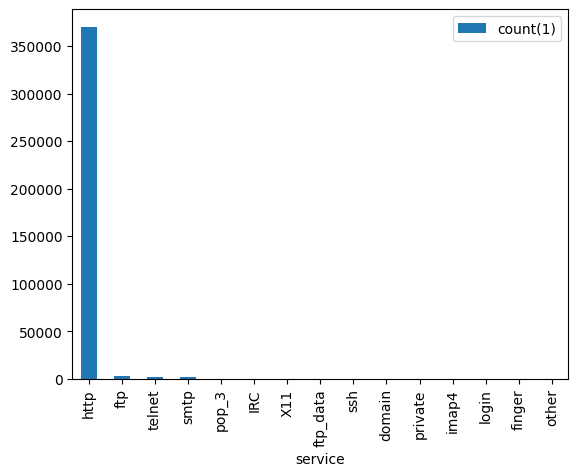

In [ ]:
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='count(1)',ascending=False).plot(x='service', y='count(1)', kind = 'bar')

Let’s use logarithmic scale for Y axis.

<Axes: xlabel='service'>

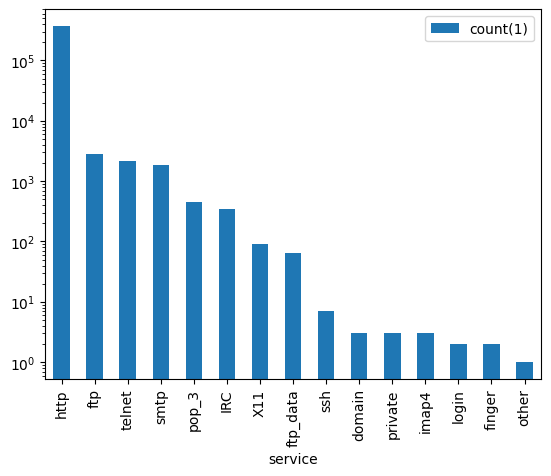

In [ ]:
pandas_df.sort_values(by='count(1)',ascending=False).plot(x='service', y='count(1)', kind = 'bar', logy=True)

In [ ]:
%%shell
jupyter nbconvert --to html /content/KDDCup_week6.ipynb

[NbConvertApp] Converting notebook /content/KDDCup_week6.ipynb to html
[NbConvertApp] Writing 965707 bytes to /content/KDDCup_week6.html
